In [16]:
# !dir /od "osaka"

 �h���C�u H �̃{�����[�� ���x���� superconducting.qubit@gmail.c... �ł�

�t�@�C����������܂���



 �{�����[�� �V���A���ԍ��� 1983-1116 �ł�

 h:\�}�C�h���C�u\RyoyaOhashi\JPA_tools\JPA_measurement �̃f�B���N�g��



In [3]:
import subprocess
import re
import numpy as np
import matplotlib.pylab as pl
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

In [4]:
# folders
folder01 = "22k_20221202_231908_0.065-0.09V_10.0-11.5"
filename01 = "20221202_231908_40dB_0.065V.csv"
file_day01 = "20221202_231908_40dB_"
csvname01 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/XLD_csv/" + folder01 + "/" + filename01

folder02 = "22k_20221203_020440_0.09-0.115V_10.0-11.5"
filename02 = "20221203_020440_40dB_0.09V.csv"
file_day02 = "20221203_020440_40dB_"
csvname02 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/XLD_csv/" + folder02 + "/" + filename02

df01 = pd.read_csv(csvname01, sep=',',header=None, usecols=[0,1,2,3,4,5])
all_freq = df01.iloc[17:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

df02 = pd.read_csv(csvname02, sep=',',header=None, usecols=[0,1,2,3,4,5])

"""csvファイルに記載の基礎データ読み取り"""
dB = float(df01.iat[0, 5])
print(dB)
minV01 = float(df01.iat[1,5])
maxV01 = float(df01.iat[2,5])
numV01 = int(df01.iat[3,5])
# maxV01 = 0.114
# numV01 = 19


minV02 = float(df02.iat[1,5])
maxV02 = float(df02.iat[2,5])
numV02 = int(df02.iat[3,5])

v01 = np.linspace(minV01, maxV01, numV01)
if v01[1] > 0:
    v01 = v01
else:
    v01 = np.flip(v01)
print(v01)

v02 = np.linspace(minV02, maxV02, numV02)
if v02[1] > 0:
    v02 = v02
else:
    v02 = np.flip(v02)
print(v02)

v = np.concatenate([v01, v02])
print(minV01, maxV01)
print(minV02, maxV02, v)

17      10.000000000
18      10.000750000
19      10.001500000
20      10.002250000
21      10.003000000
            ...     
2013    11.497000000
2014    11.497750000
2015    11.498500000
2016    11.499250000
2017    11.500000000
Name: 1, Length: 2001, dtype: object 17    10.000000000
Name: 1, dtype: object 2017    11.500000000
Name: 1, dtype: object
40.0
[0.065   0.06625 0.0675  0.06875 0.07    0.07125 0.0725  0.07375 0.075
 0.07625 0.0775  0.07875 0.08    0.08125 0.0825  0.08375 0.085   0.08625
 0.0875  0.08875 0.09   ]
[0.09    0.09125 0.0925  0.09375 0.095   0.09625 0.0975  0.09875 0.1
 0.10125 0.1025  0.10375 0.105   0.10625 0.1075  0.10875 0.11    0.11125
 0.1125  0.11375 0.115  ]
0.065 0.09
0.09 0.115 [0.065   0.06625 0.0675  0.06875 0.07    0.07125 0.0725  0.07375 0.075
 0.07625 0.0775  0.07875 0.08    0.08125 0.0825  0.08375 0.085   0.08625
 0.0875  0.08875 0.09    0.09    0.09125 0.0925  0.09375 0.095   0.09625
 0.0975  0.09875 0.1     0.10125 0.1025  0.10375 0.105   0.10625

In [5]:
vault1 = np.array([])
vault2 = np.array([])
v_2001 = np.zeros(len(all_freq))
for m,n in enumerate(v01):
    # print(n)
    # n = round(n,3)
    filename = file_day01 + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/XLD_csv/" + folder01 + "/" + filename
    dat1 = np.loadtxt(csvname1, skiprows=17, delimiter=',', unpack=True, usecols=[0,1,2,3])
    # phase[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)
    
    # print(dat[:,0])
    # dat[0,:] = v[m]
    
    for n in range(len(all_freq)):
        v_2001[n] = v01[m]
        # print(n)
    # print(v_2001)
    
    dat1[0,:] = v_2001
    r,c = dat1.shape
    # print(dat1)

    # print(dat1.ravel())
    # np.savetxt("dat1.ravel"+str([m]), dat1.ravel(), delimiter=",")
    # vault = np.vstack((vault,dat)) if vault.size > 0 else dat.ravel()
    vault1 = np.vstack((vault1,dat1.ravel())) if vault1.size > 0 else dat1.ravel()
    # print(vault1)
# print(vault1)
# print(vault1.shape[0])

# np.savetxt("vault1[1]", vault1[1], delimiter=",")
vault1re=vault1.reshape((vault1.shape[0],r,c))
# np.savetxt("vault1re", vault1re, delimiter=",")

vault = np.array([])
v_2001 = np.zeros(len(all_freq))
for m,n in enumerate(v02):
    # print(n)
    # n = round(n,3)
    filename = file_day02 + str(n) + "V.csv"
    csvname2 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/XLD_csv/" + folder02 + "/" + filename
    dat2 = np.loadtxt(csvname2, skiprows=17, delimiter=',', unpack=True, usecols=[0,1,2,3])
    # phase[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)
    
    # print(dat[:,0])
    # dat[0,:] = v[m]
    
    for n in range(len(all_freq)):
        v_2001[n] = v02[m]
        # print(n)
    # print(v_2001)
    
    dat2[0,:] = v_2001
    r,c = dat2.shape
    # print(dat2[0,:])

    # print(dat2.ravel())
    # np.savetxt("dat2.ravel"+str([m]), dat2.ravel(), delimiter=",")
    # vault = np.vstack((vault,dat)) if vault.size > 0 else dat.ravel()
    vault2 = np.vstack((vault2,dat2.ravel())) if vault2.size > 0 else dat2.ravel()
    # print(vault2)
# print(vault2)
# np.savetxt("vault2[1]", vault2[1], delimiter=",")
# np.savetxt("dat2.ravel", dat2.ravel(), delimiter=",")
vault2re=vault2.reshape((vault2.shape[0],r,c))
# np.savetxt("vault2re", vault2re, delimiter=",")


vault = np.concatenate([vault1re, vault2re])
print(vault[21],len(vault))

# print(vault.shape[0],r,c)
# print(vault[:,:,1])

# np.savetxt("vault", vault, delimiter=",")
np.savetxt("vault[0]", vault[0], delimiter=",")
# np.savetxt("dat", dat, delimiter=",")



[[  0.09      0.09      0.09    ...   0.09      0.09      0.09   ]
 [ 10.       10.00075  10.0015  ...  11.4985   11.49925  11.5    ]
 [-76.97425 -77.09665 -77.12817 ... -79.09083 -79.22144 -79.26134]
 [-20.94295 -19.06853 -18.38014 ...  70.79394  70.25157  69.11102]] 42


phase plot

In [6]:
# vault[:,2,:]
re0=np.power(10,vault[:,2,:]/20)*np.cos(np.pi*vault[:,3,:]/180)
im0=np.power(10,vault[:,2,:]/20)*np.sin(np.pi*vault[:,3,:]/180)
vault[:,2,:]=re0.copy()
vault[:,3,:]=im0.copy()

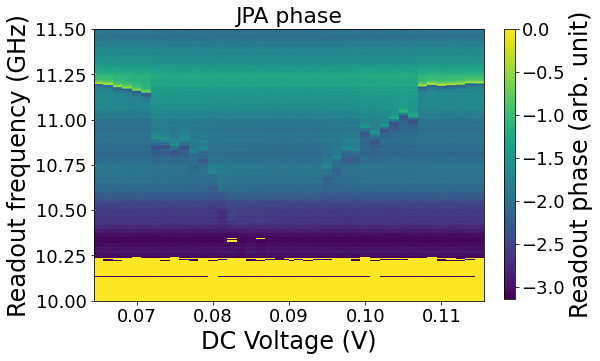

In [7]:
#　位相評価
import matplotlib.pyplot as pl
fig, ax = pl.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(vault[:,0,:],vault[:,1,:],  np.angle(-(vault[:,2,:]+1j*vault[:,3,:])))
hoge00.set_clim(-3.14,0)
cax = pl.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = pl.colorbar(hoge00, cax=cax)
# cbar = fig.colorbar(ticks=[-3.14,-2,-1 0, 1,2,3.14])

ax.set_title("JPA phase", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout phase (arb. unit)", size=24) #カラーバーのラベル
ax.tick_params(labelsize=18)
pl.tick_params(labelsize=18)

pl.show()
del pl

d(theta)/d(current) obtained through the numerical derivation using gauss convolution

41


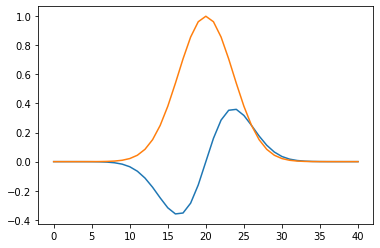

In [8]:
import matplotlib.pyplot as pl
import numpy as np
sigma=0.6
s = 20
t=6
x=np.arange(-s,s+0.1)/t;
g=x*np.exp(-x*x/2/sigma**2)
h=np.exp(-x*x/2/sigma**2)
print(len(x))
# print(g,g.shape,h,h.shape)
pl.plot(g)
pl.plot(h)


In [9]:
#　微分評価, vault[:,2,:]
rdiff=np.array([])
idiff=np.array([])
reg  =np.array([])
img  =np.array([])
# for i in range(r):
for i in range(c):
  _dat=np.convolve(g,vault[:,2,i],'same');  rdiff=np.vstack((rdiff,_dat)) if rdiff.size > 0 else _dat
  _dat=np.convolve(g,vault[:,3,i],'same');  idiff=np.vstack((idiff,_dat)) if idiff.size > 0 else _dat
  _dat=np.convolve(h,vault[:,2,i],'same');  reg=np.vstack((reg,_dat)) if reg.size > 0 else _dat
  _dat=np.convolve(h,vault[:,3,i],'same');  img=np.vstack((img,_dat)) if img.size > 0 else _dat

rdiff=rdiff.T
idiff=idiff.T
reg=reg.T
img=img.T

print(idiff.shape,rdiff.shape)
print(vault[:,2,:].shape)

(42, 2001) (42, 2001)
(42, 2001)


phse difference

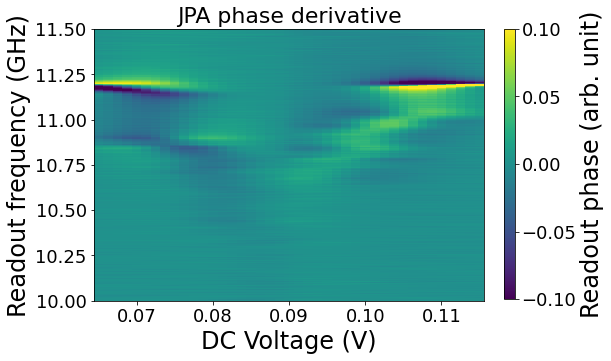

In [15]:
#　微分評価
import matplotlib.pyplot as pl

r2=reg*reg+img*img
diff=(idiff*reg-rdiff*img)/r2

fig, ax = pl.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(vault[:,0,:],vault[:,1,:],diff)
hoge00.set_clim(-0.10,0.10)
cax = pl.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = pl.colorbar(hoge00, cax=cax)
# cbar = fig.colorbar(ticks=[-3.14,-2,-1 0, 1,2,3.14])

ax.set_title("JPA phase derivative", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout phase (arb. unit)", size=24) #カラーバーのラベル
pl.tick_params(labelsize=18)
ax.tick_params(labelsize=18)


pl.show()
del pl